## 1. Business Understanding

![Honey Bardger](Tesla.jpg)

#### **1.1 Business Overview**
Tesla, Inc. is an American multinational automotive and clean energy company headquartered in Austin, Texas.Tesla is a leading company in the electric vehicle revolution and has been instrumental in making EVs more popular and accessible.

#### **1.2 Problem statement**
Tesla, Inc., as a pioneering force in the electric vehicle industry, has experienced significant fluctuations in its stock performance. Investors are keen to understand the potential return on investment (ROI) to make informed decisions. The challenge is to predict the return on investment by analyzing the stock's historical performance, identifying trends, understanding volatility, and uncovering relationships between various price points. This predictive model aims to provide accurate and actionable insights to support strategic investment decisions.This data will be useful to investors and financial analysts.


#### **1.3 Objectives**
To understand the stock's performance over time by examining daily data points, including the opening price, high price, low price, closing price, trading volume, and adjusted closing price.

**specific objectives**

1. Analyze historical stock market data to gain actionable insights into the stock's performance.
2. Identify trends and patterns in the stock's daily price movements and trading volume.
3. Evaluate key metrics such as opening price, high price, low price, closing price, trading volume, and adjusted closing price.
4. Support informed investment decisions by providing accurate and relevant data analysis.
5. Determine correlations between different price points and trading volume.

#### **1.4 Success Criteria**
Success will be measured by the accuracy of the insights and the practical applicability of the analysis in supporting strategic investment choices.


Source: https://www.kaggle.com/rpaguirre/tesla-stock-price

## 2. Data Understanding
The date - "Date"

The opening price of the stock - "Open"

The high price of that day - "High"

The low price of that day - "Low"

The closed price of that day - "Close"

The amount of stocks traded during that day - "Volume"

The stock's closing price that has been amended to include any distributions/corporate actions that occurs before next days open - "Adj[usted] Close"

In [2]:
# import libraries
import pandas as pd

In [5]:
# load data
Tesla = pd.read_csv('Tesla Dataset.csv')
Tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/29/2010,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,6/30/2010,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,7/1/2010,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,7/2/2010,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,7/6/2010,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


### 3. Data Preparation

In [7]:
Tesla.shape

(3509, 7)

In [11]:
Tesla.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [17]:
# To print unique values and their lengths
for col in Tesla.columns:
    unique_values = Tesla[col].unique()
    print(f'{col} (unique count: {len(unique_values)}): {unique_values[:]}')


Date (unique count: 3509): ['6/29/2010' '6/30/2010' '7/1/2010' ... '6/4/2024' '6/5/2024' '6/6/2024']
Open (unique count: 3204): [  1.266667   1.719333   1.666667 ... 174.779999 175.350006 174.419998]
High (unique count: 3197): [  1.666667   2.028      1.728    ... 177.759995 176.149994 176.919998]
Low (unique count: 3214): [  1.169333   1.553333   1.351333 ... 174.       172.130005 172.729996]
Close (unique count: 3309): [  1.592667   1.588667   1.464    ... 174.770004 175.       175.440002]
Adj Close (unique count: 3309): [  1.592667   1.588667   1.464    ... 174.770004 175.       175.440002]
Volume (unique count: 3478): [281494500 257806500 123282000 ...  60056300  57614800  29887849]


In [19]:
Tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3509.000000,3509.000000,3509.000000,3509.000000,3509.000000,3.509000e+03
mean,74.057486,75.666813,72.324719,74.032508,74.032508,9.683246e+07
std,101.999514,104.244555,99.528061,101.915952,101.915952,7.894845e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,11.346000,11.580000,11.037333,11.328667,11.328667,4.716300e+07
50%,17.334000,17.563999,16.974667,17.330667,17.330667,8.203590e+07
75%,147.783340,150.940002,143.566666,147.383331,147.383331,1.226560e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


## 4. Data Cleaning

**4.1 Validity**

In [21]:
# Convert 'Date' to datetime column
Tesla['Date'] = pd.to_datetime(Tesla['Date'])

In [22]:
Tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [23]:
# Set 'Date' column as the index
Tesla.set_index('Date', inplace=True)

In [24]:
Tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


**4.2 Accuracy**

In [33]:
import yfinance as yf
# Fetch real-world data using yfinance
ticker = 'TSLA'
real_world_data = yf.download(ticker, start=Tesla.index.min(), end=Tesla.index.max())

# Extract relevant columns from real-world data
real_world_data = real_world_data[['Open', 'High', 'Low', 'Close','Adj Close','Volume']]
# Compare your dataset with the real-world data
comparison = Tesla[['Open', 'High', 'Low', 'Close','Adj Close', 'Volume']].equals(real_world_data)

# Print the result
if comparison:
    print("Your dataset matches the real-world data for Tesla (TSLA).")
else:
    print("There are discrepancies between your dataset and the real-world data for Tesla (TSLA).")

[*********************100%%**********************]  1 of 1 completed

There are discrepancies between your dataset and the real-world data for Tesla (TSLA).


In [34]:
# Check for missing values
print("Missing values after cleaning:")
print(Tesla.isnull().sum())

Missing values after cleaning:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [36]:
print(Tesla.dtypes)

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [37]:
print(Tesla.duplicated().sum())

0


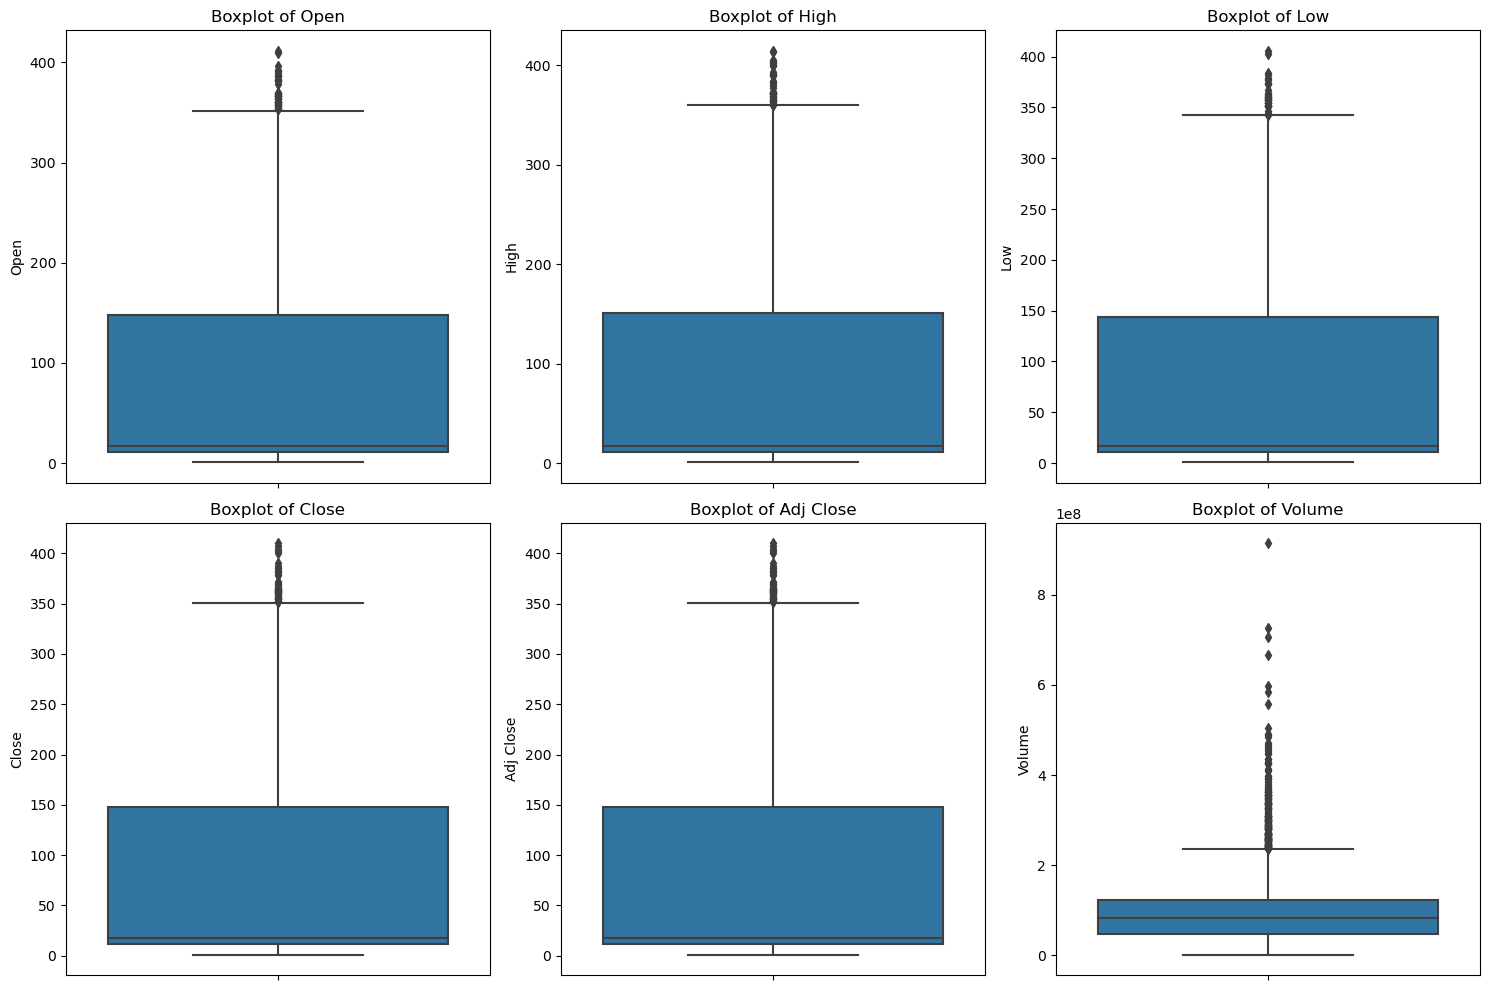

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select the relevant columns
selected_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
tesla_data = Tesla[selected_columns]
# Create boxplots for each column
plt.figure(figsize=(15, 10))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=tesla_data[column])
    plt.title(f'Boxplot of {column}')
    
plt.tight_layout()
plt.show()

In [52]:
# Check that high price is greater than or equal to low price
inconsistent_high_low = Tesla[Tesla['High'] < Tesla['Low']]
print(f"Number of inconsistent high-low price rows: {len(inconsistent_high_low)}")
# Check that closing prices are within the range of high and low prices
inconsistent_close = Tesla[(Tesla['Close'] < Tesla['Low']) | (Tesla['Close'] > Tesla['High'])]
print(f"Number of inconsistent close price rows: {len(inconsistent_close)}")

Number of inconsistent high-low price rows: 0
Number of inconsistent close price rows: 0


## 5. EDA

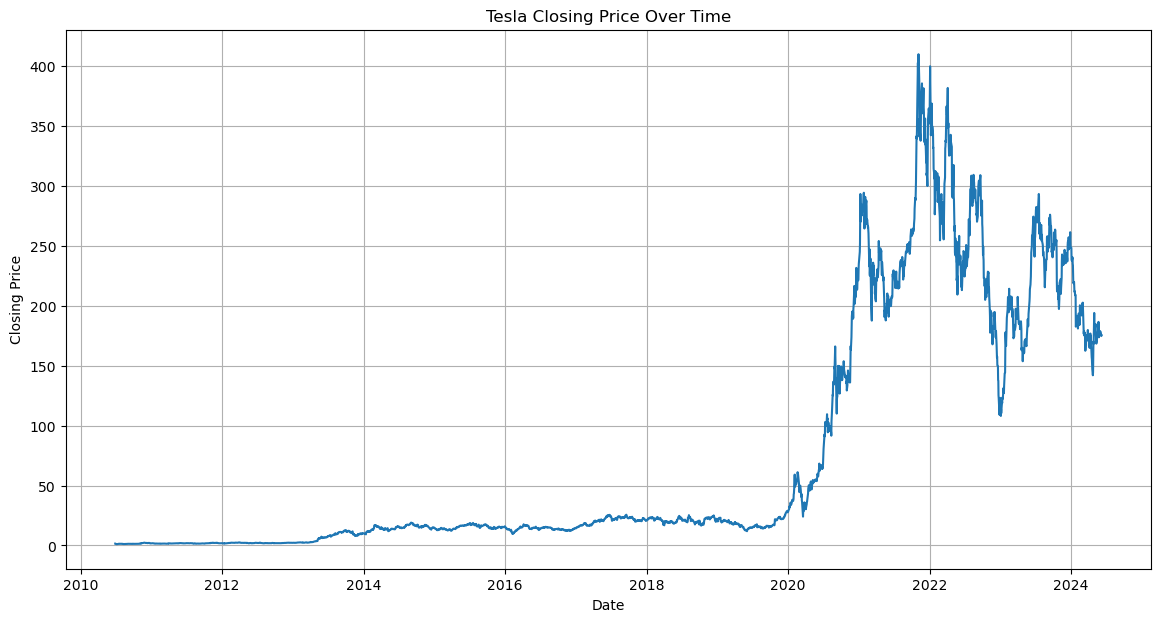

In [54]:
# Time Series Plot of the Closing Price
plt.figure(figsize=(14, 7))
plt.plot(Tesla['Close'])
plt.title('Tesla Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

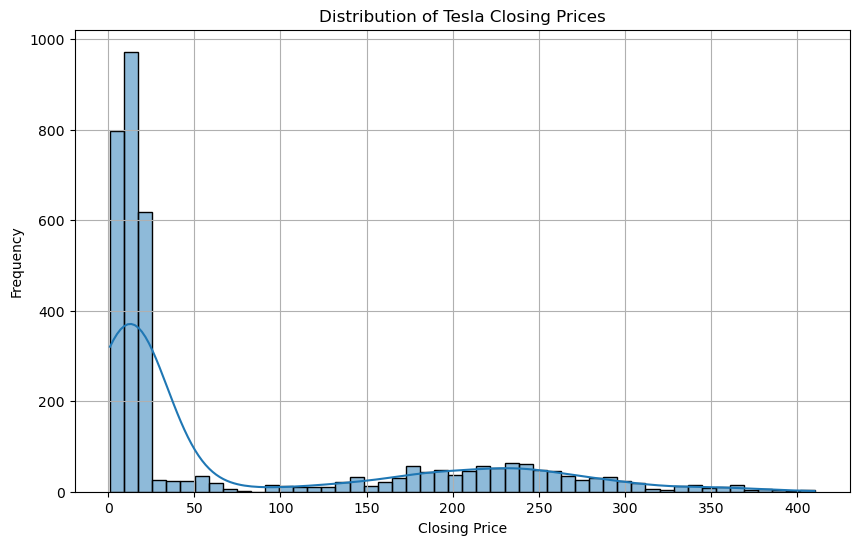

In [56]:
# Distribution Plot of Closing Price
plt.figure(figsize=(10, 6))
sns.histplot(Tesla['Close'], bins=50, kde=True)
plt.title('Distribution of Tesla Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

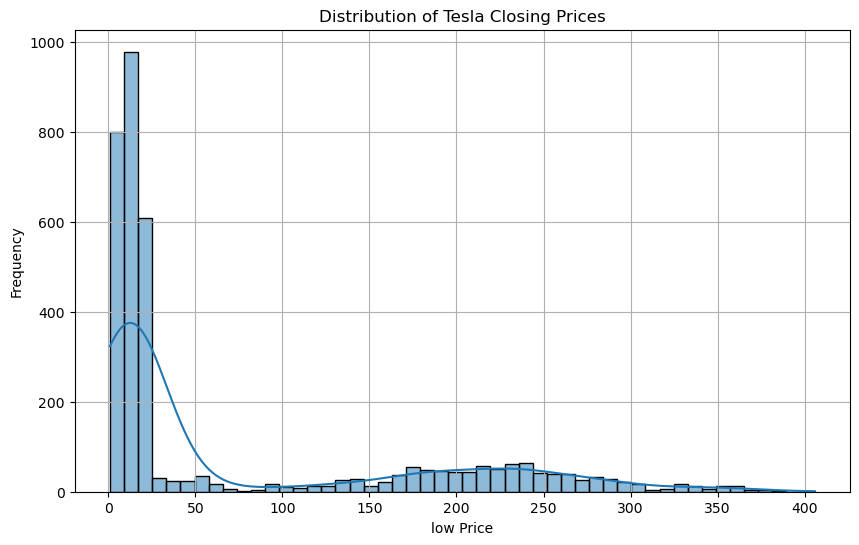

In [59]:
# Distribution Plot of Closing Price
plt.figure(figsize=(10, 6))
sns.histplot(Tesla['Low'], bins=50, kde=True)
plt.title('Distribution of Tesla Closing Prices')
plt.xlabel('low Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()